In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/raw.csv")
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
df.shape

(1000, 7)

In [4]:
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [8]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Shape of your Data Set loaded: (1000, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Brand,object,0.000000,0,,,No issue
Processor_Speed,float64,0.000000,NA,1.511580,3.998534,No issue
RAM_Size,int64,0.000000,0,4.000000,32.000000,No issue
Storage_Capacity,int64,0.000000,0,256.000000,1000.000000,Column has a high correlation with ['Price']. Consider dropping one of them.
Screen_Size,float64,0.000000,NA,11.012111,16.985737,No issue
Weight,float64,0.000000,NA,2.000560,4.990728,No issue
Price,float64,0.000000,NA,8570.012950,33503.935037,No issue


Number of All Scatter Plots = 10


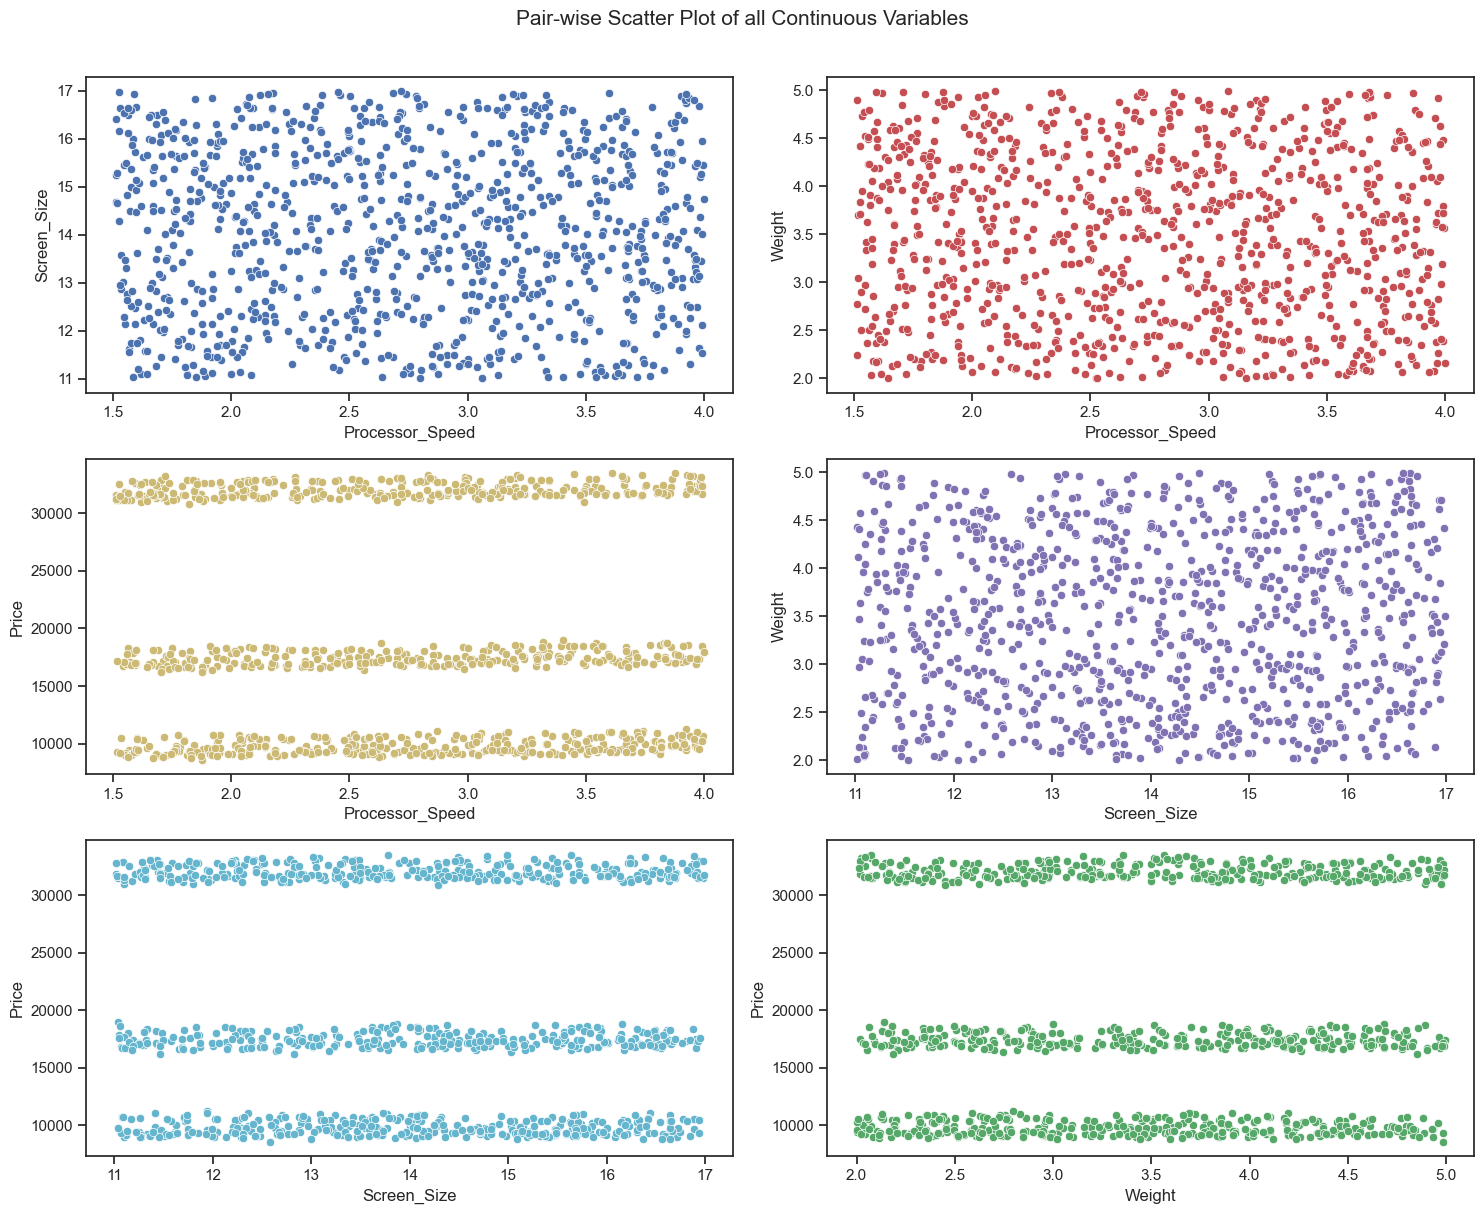

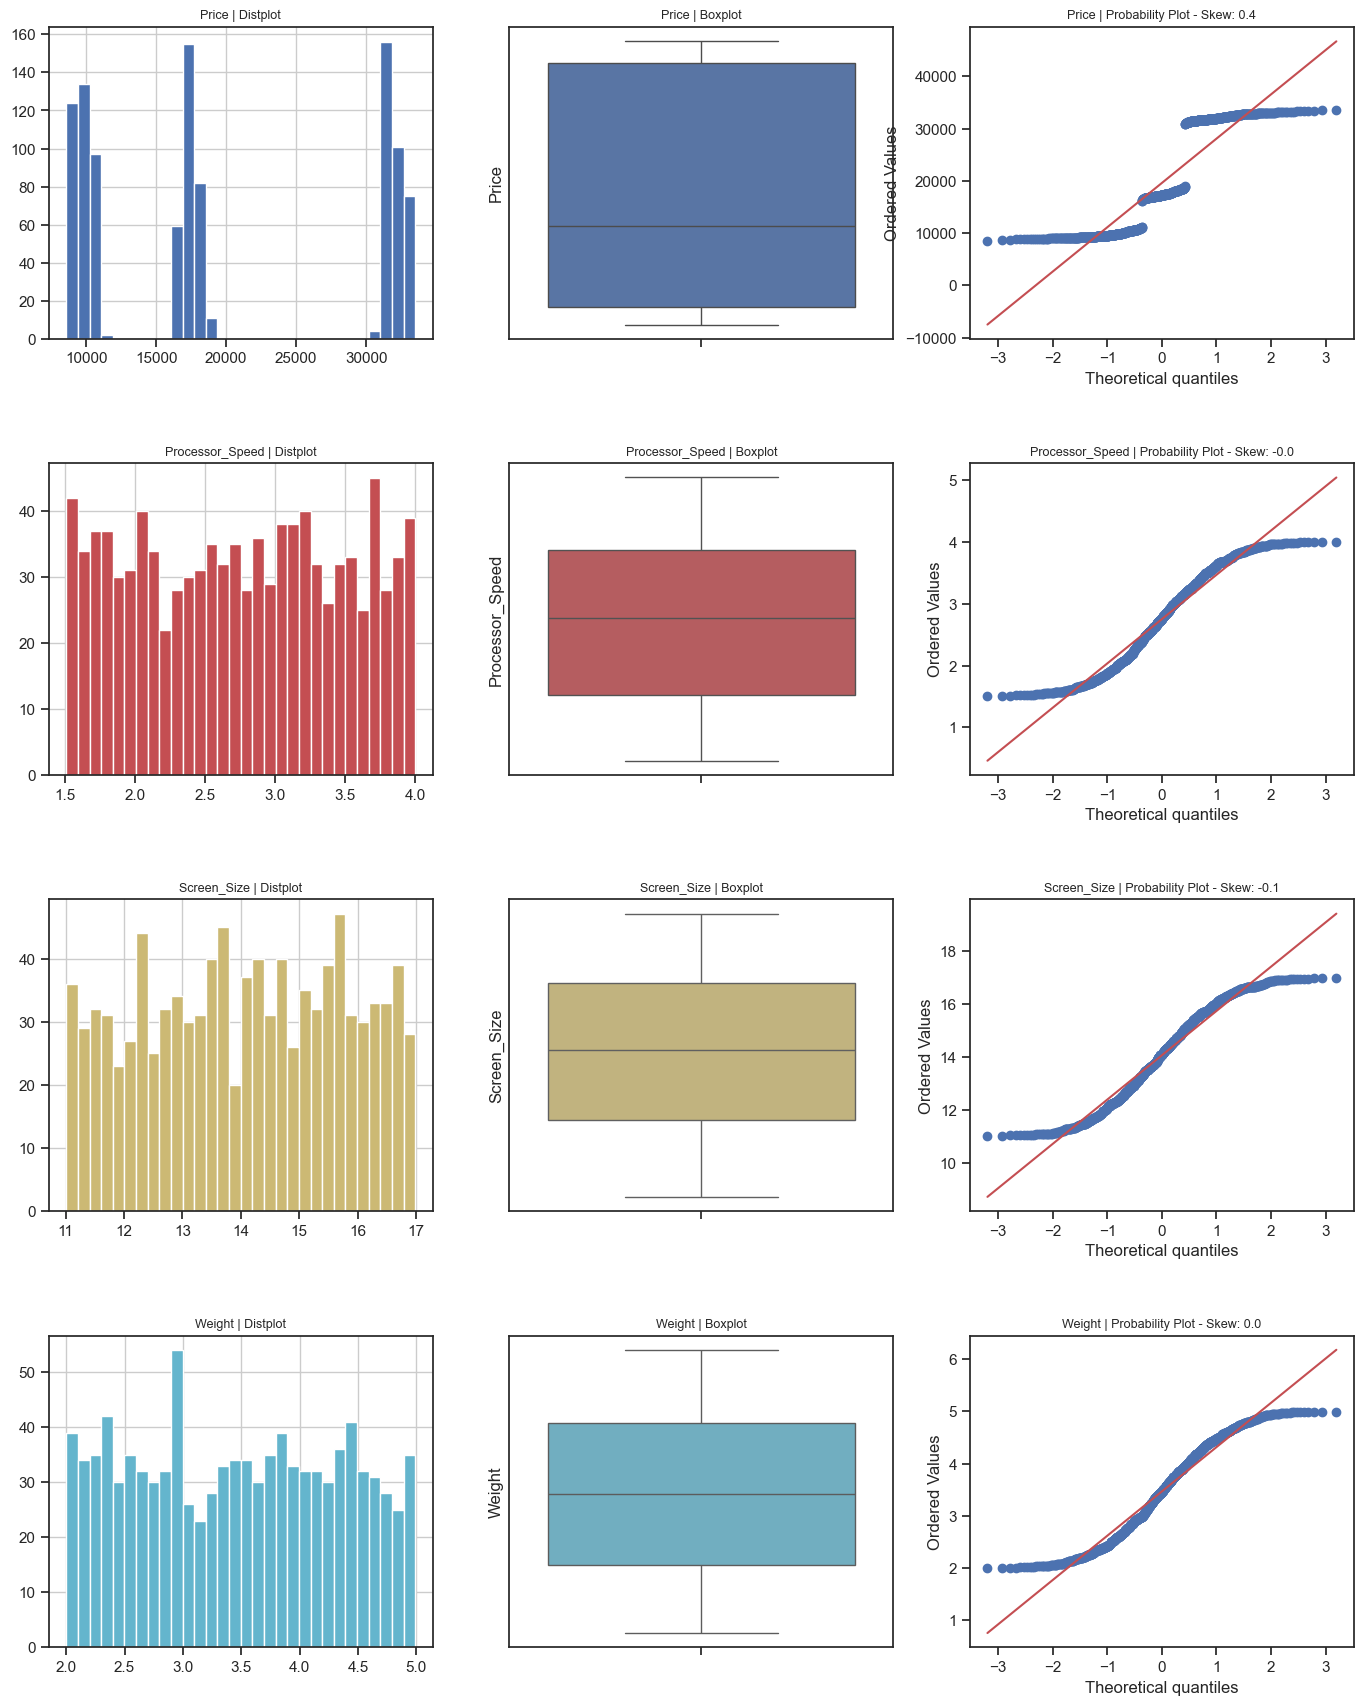

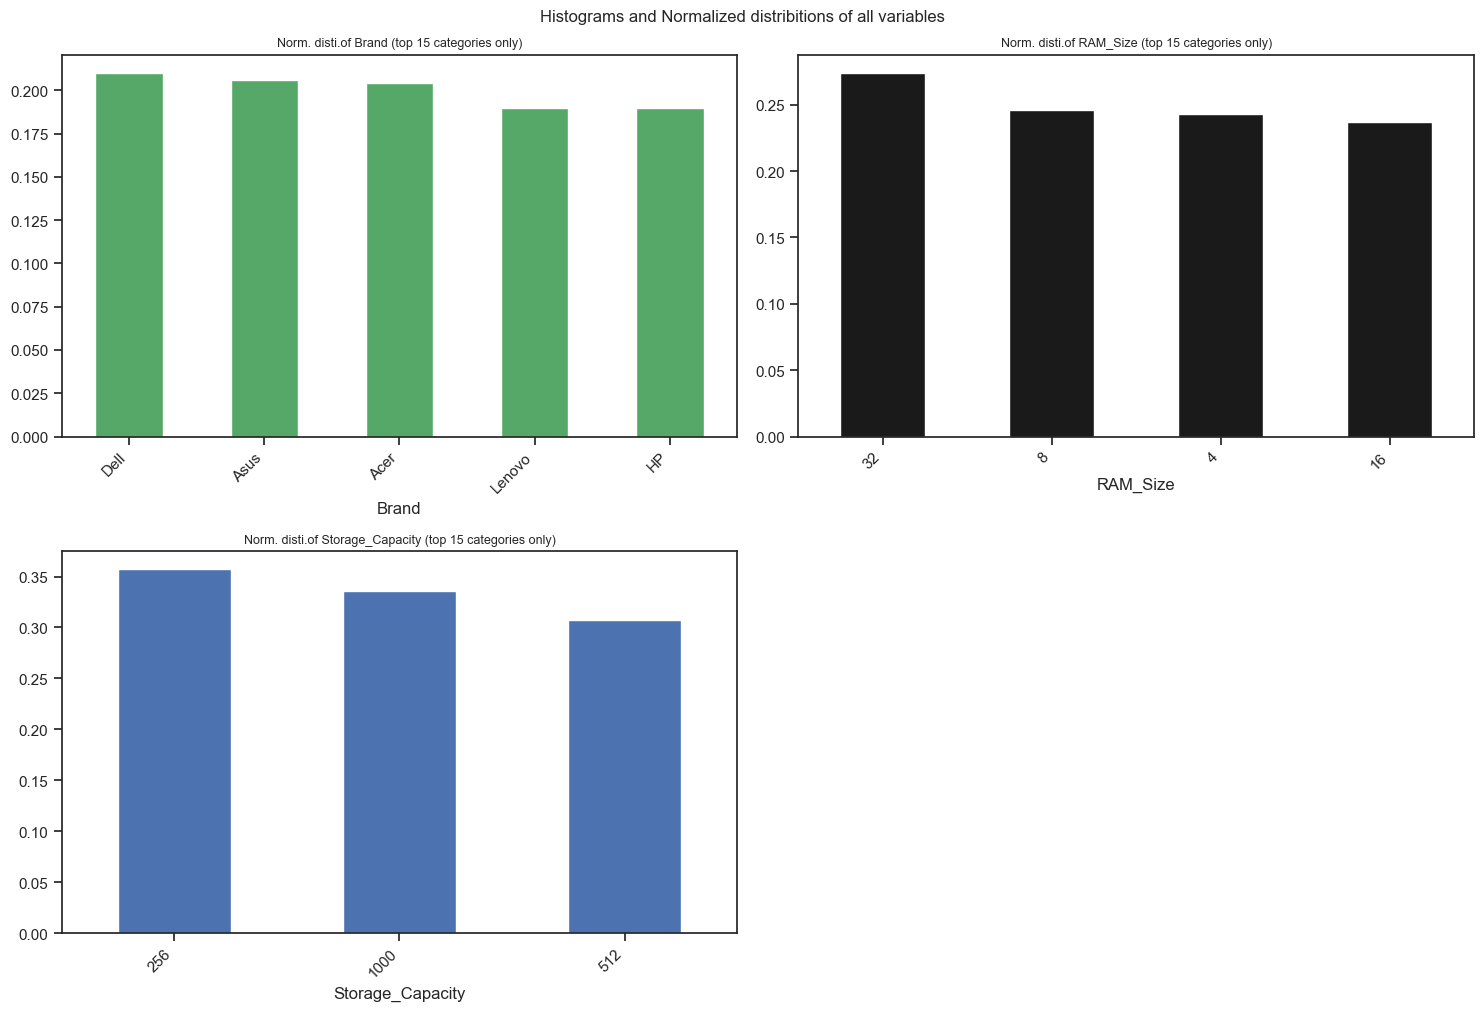

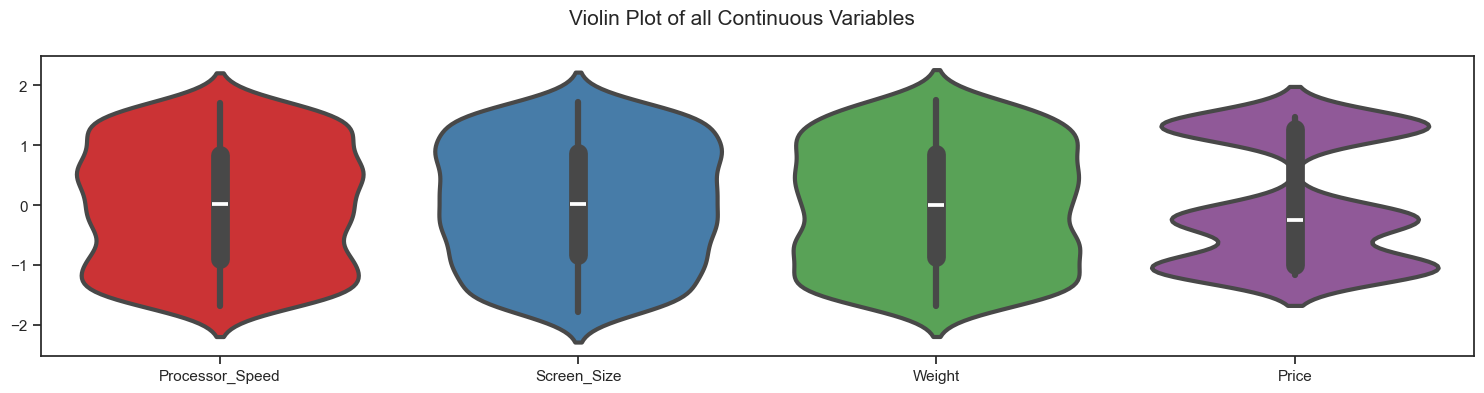

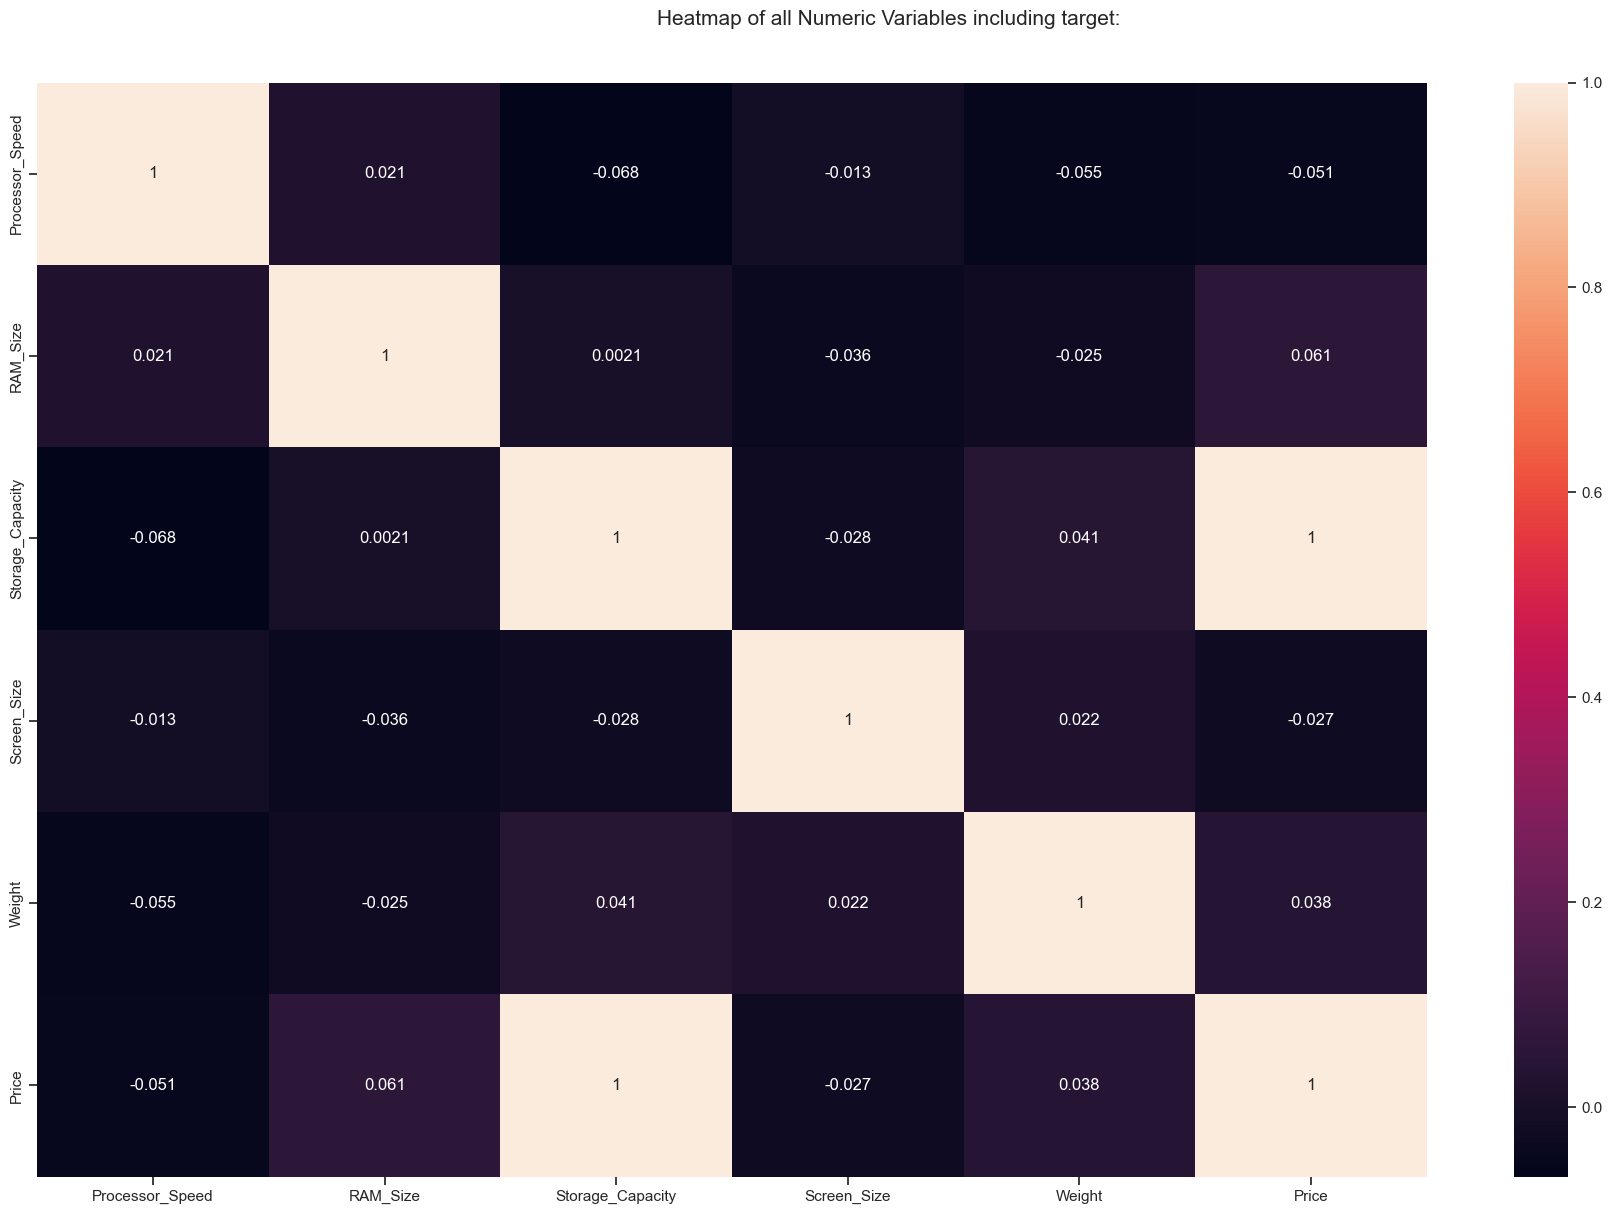

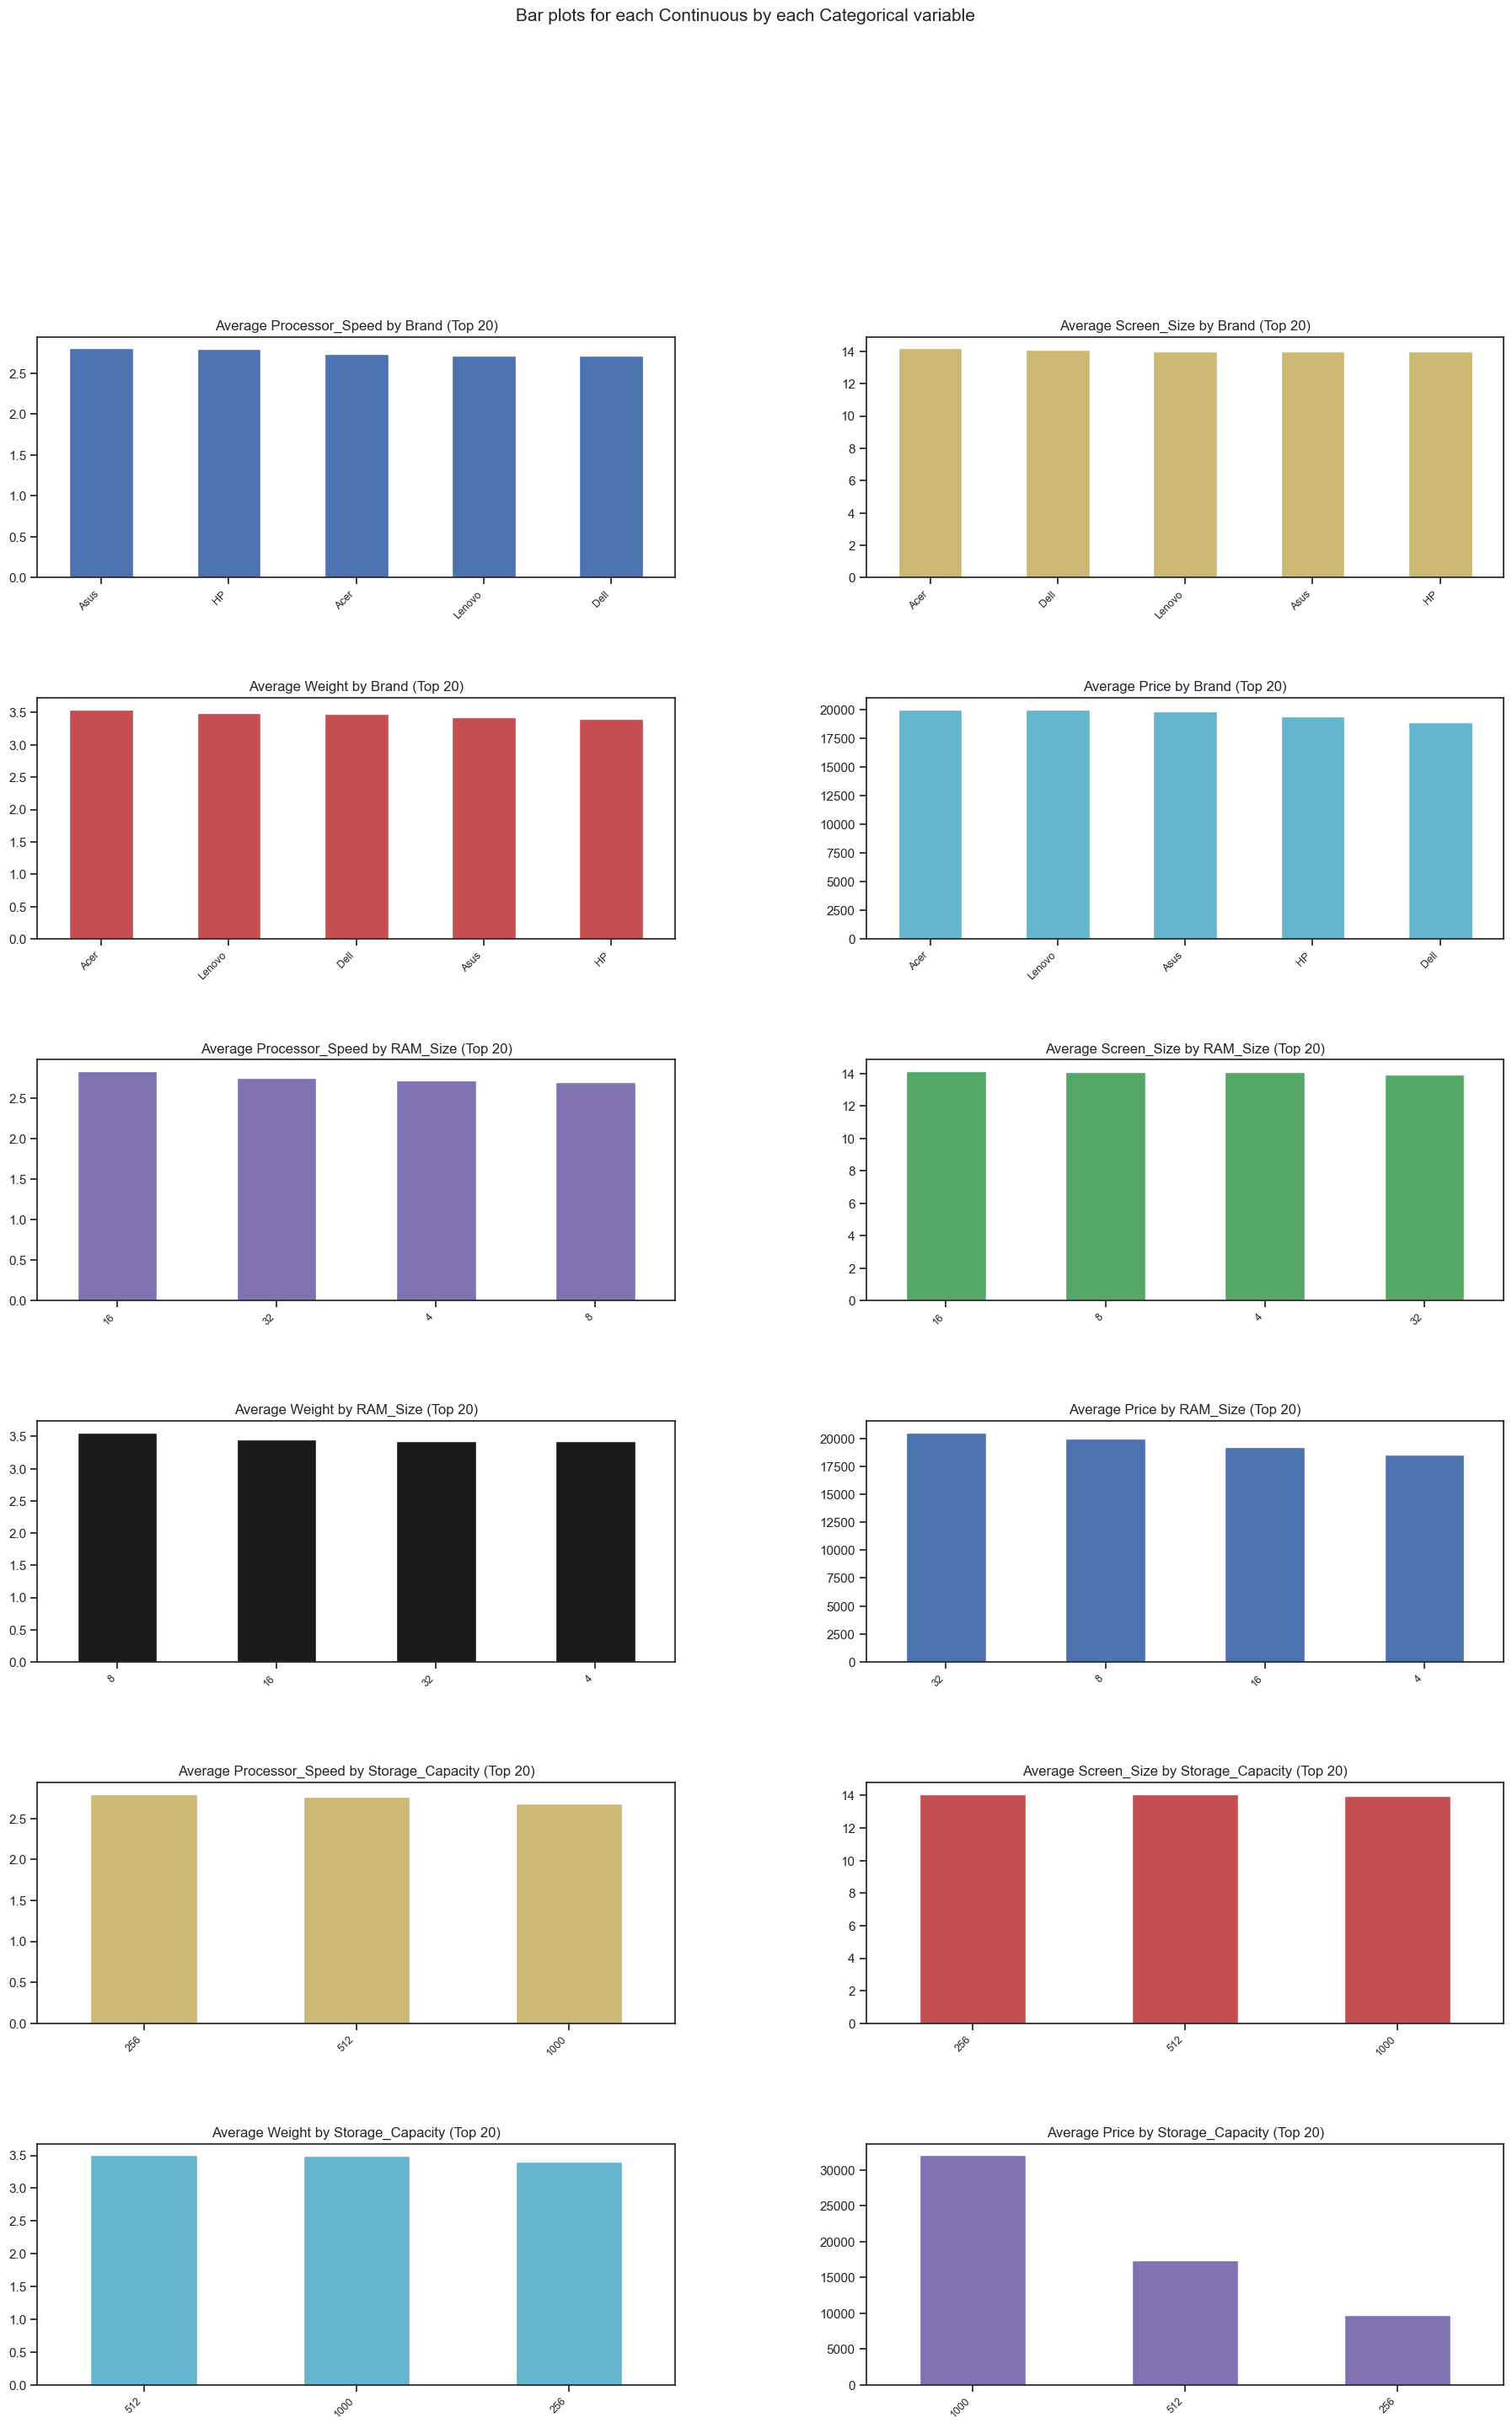

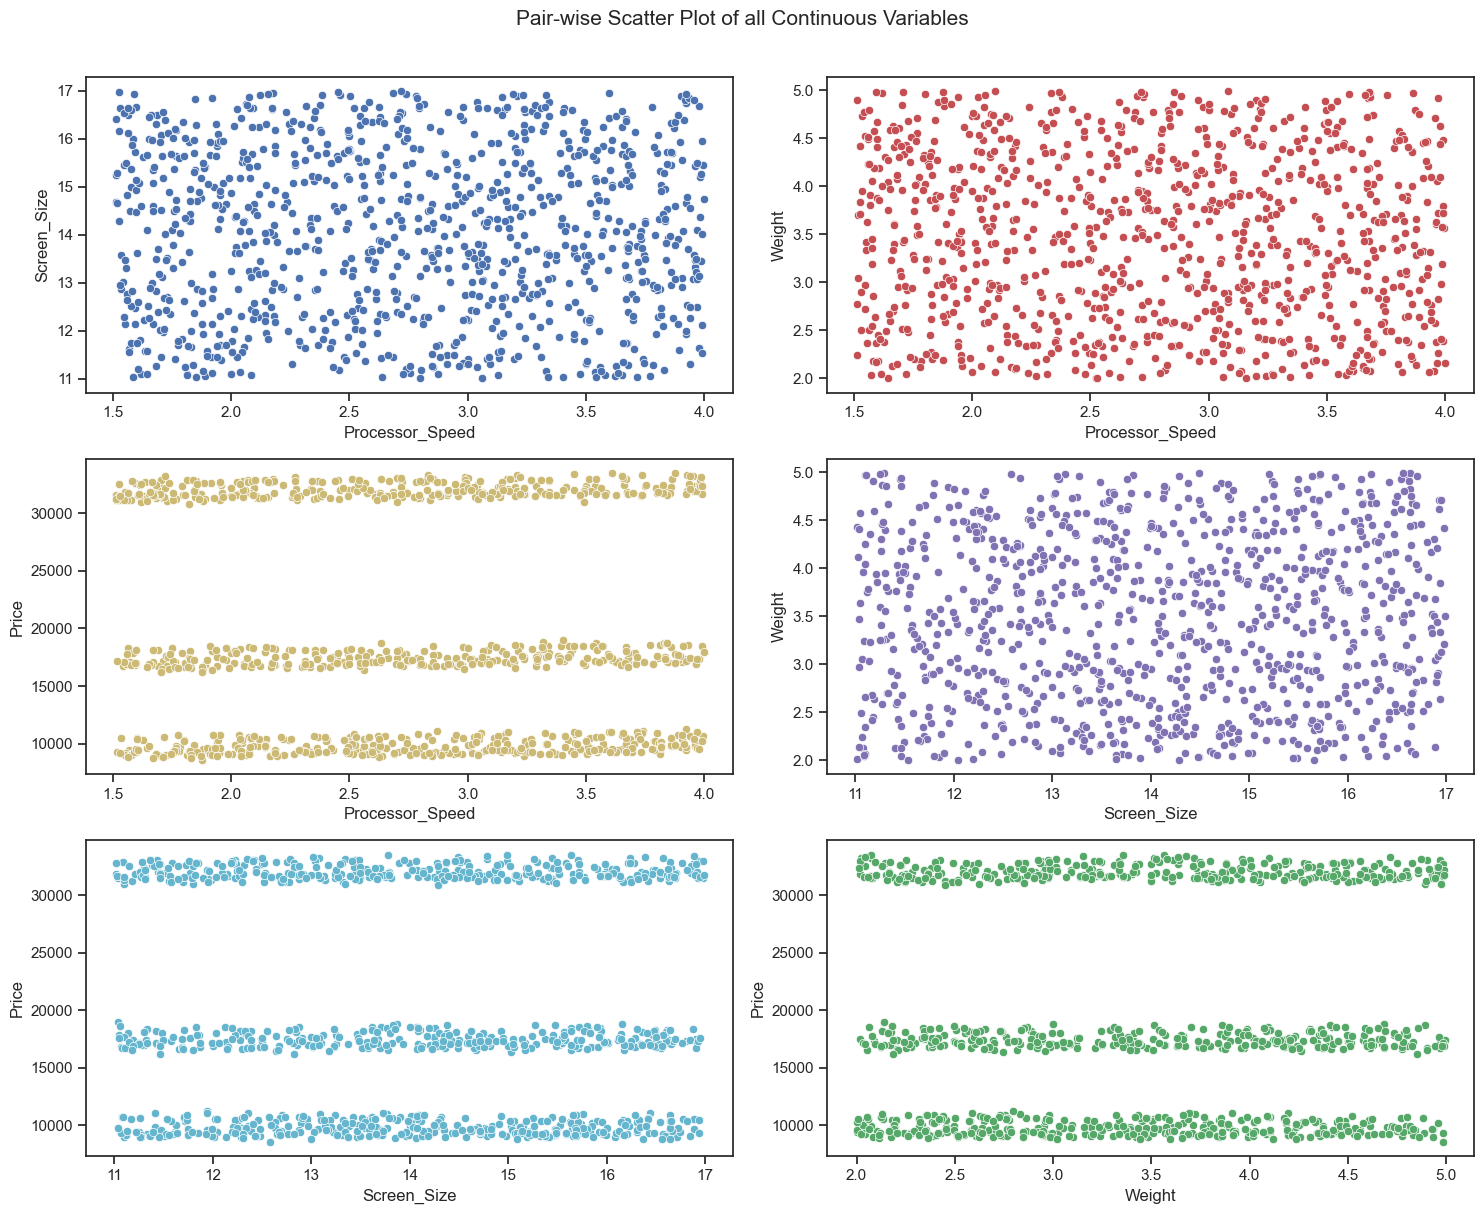

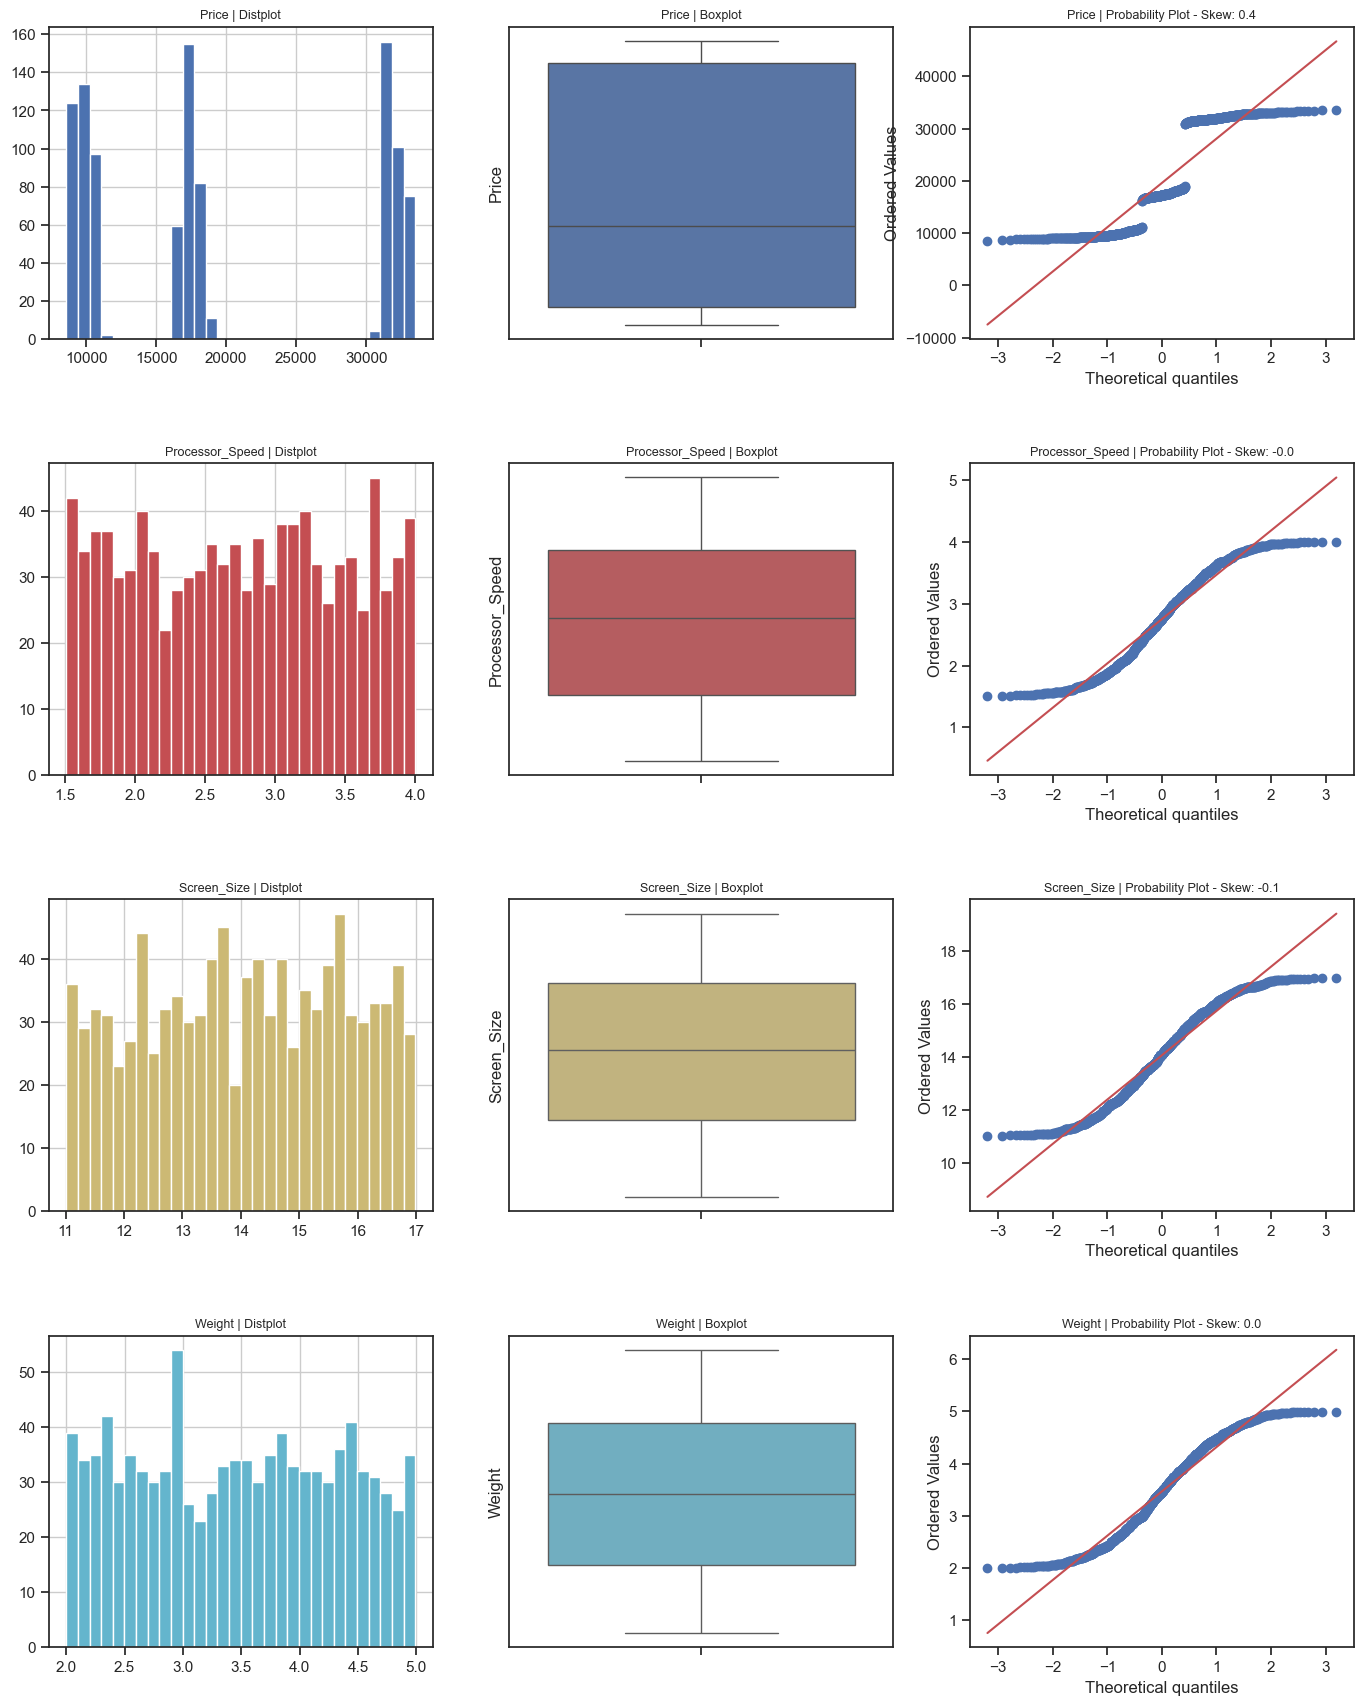

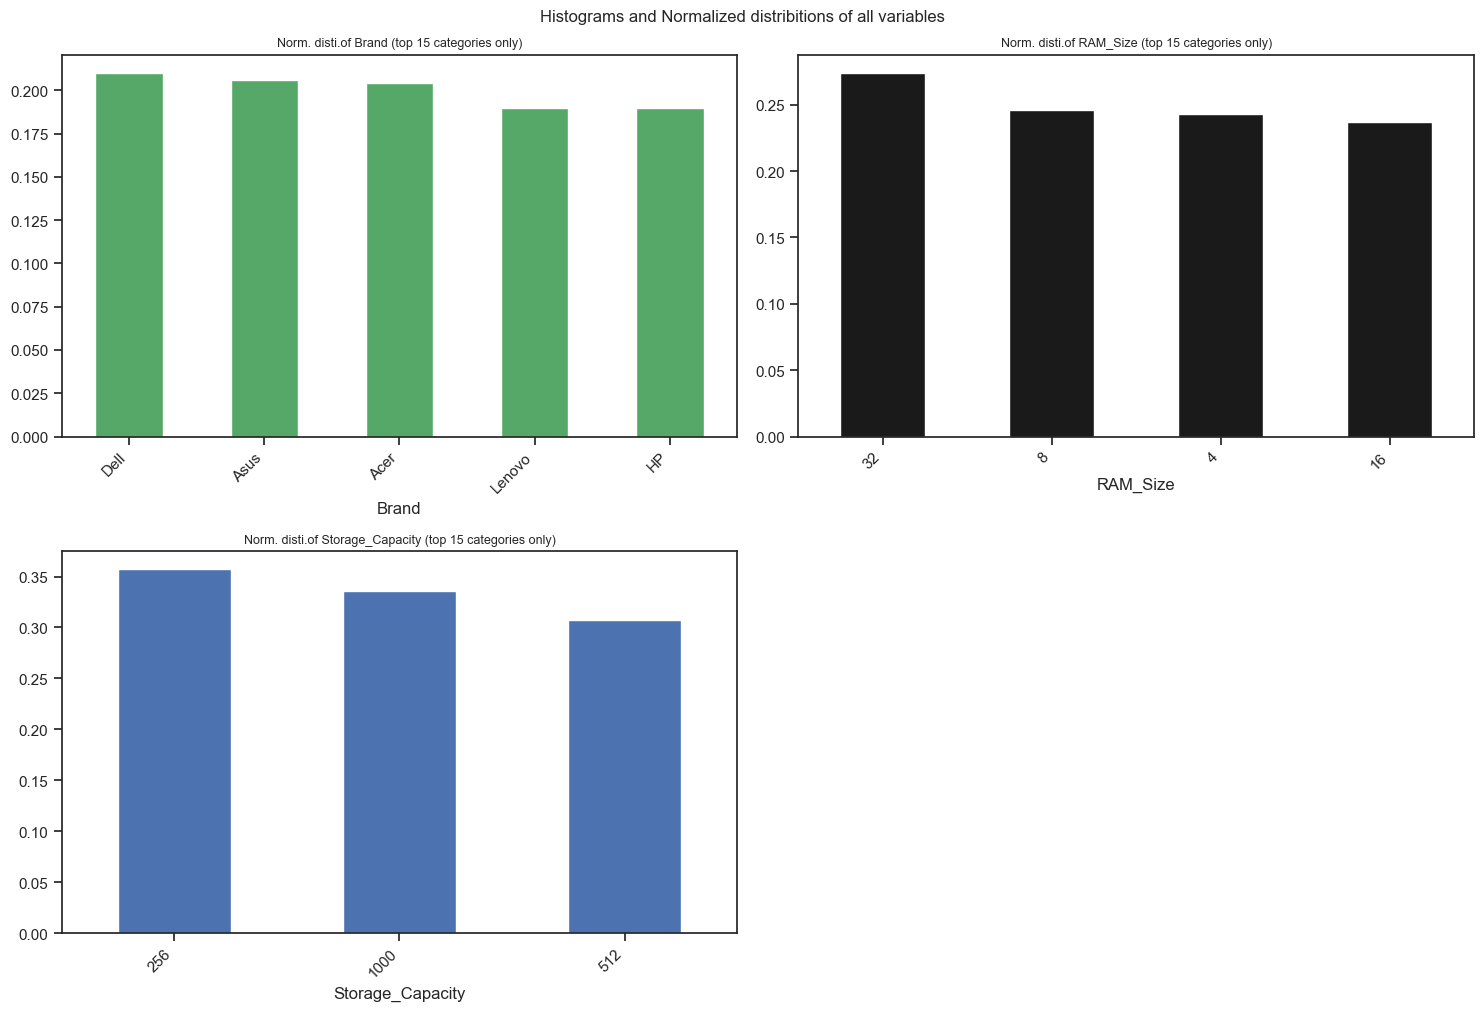

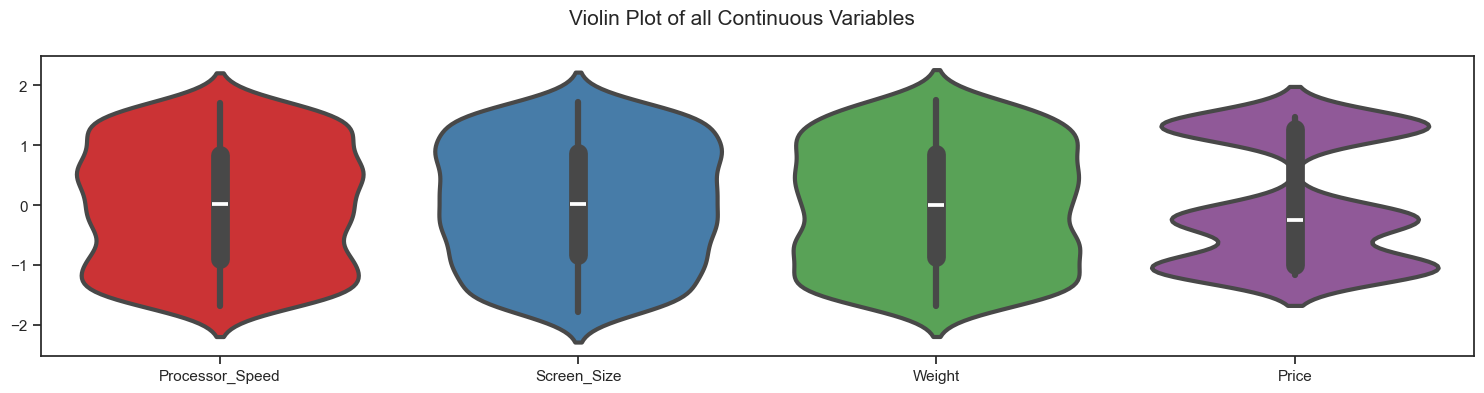

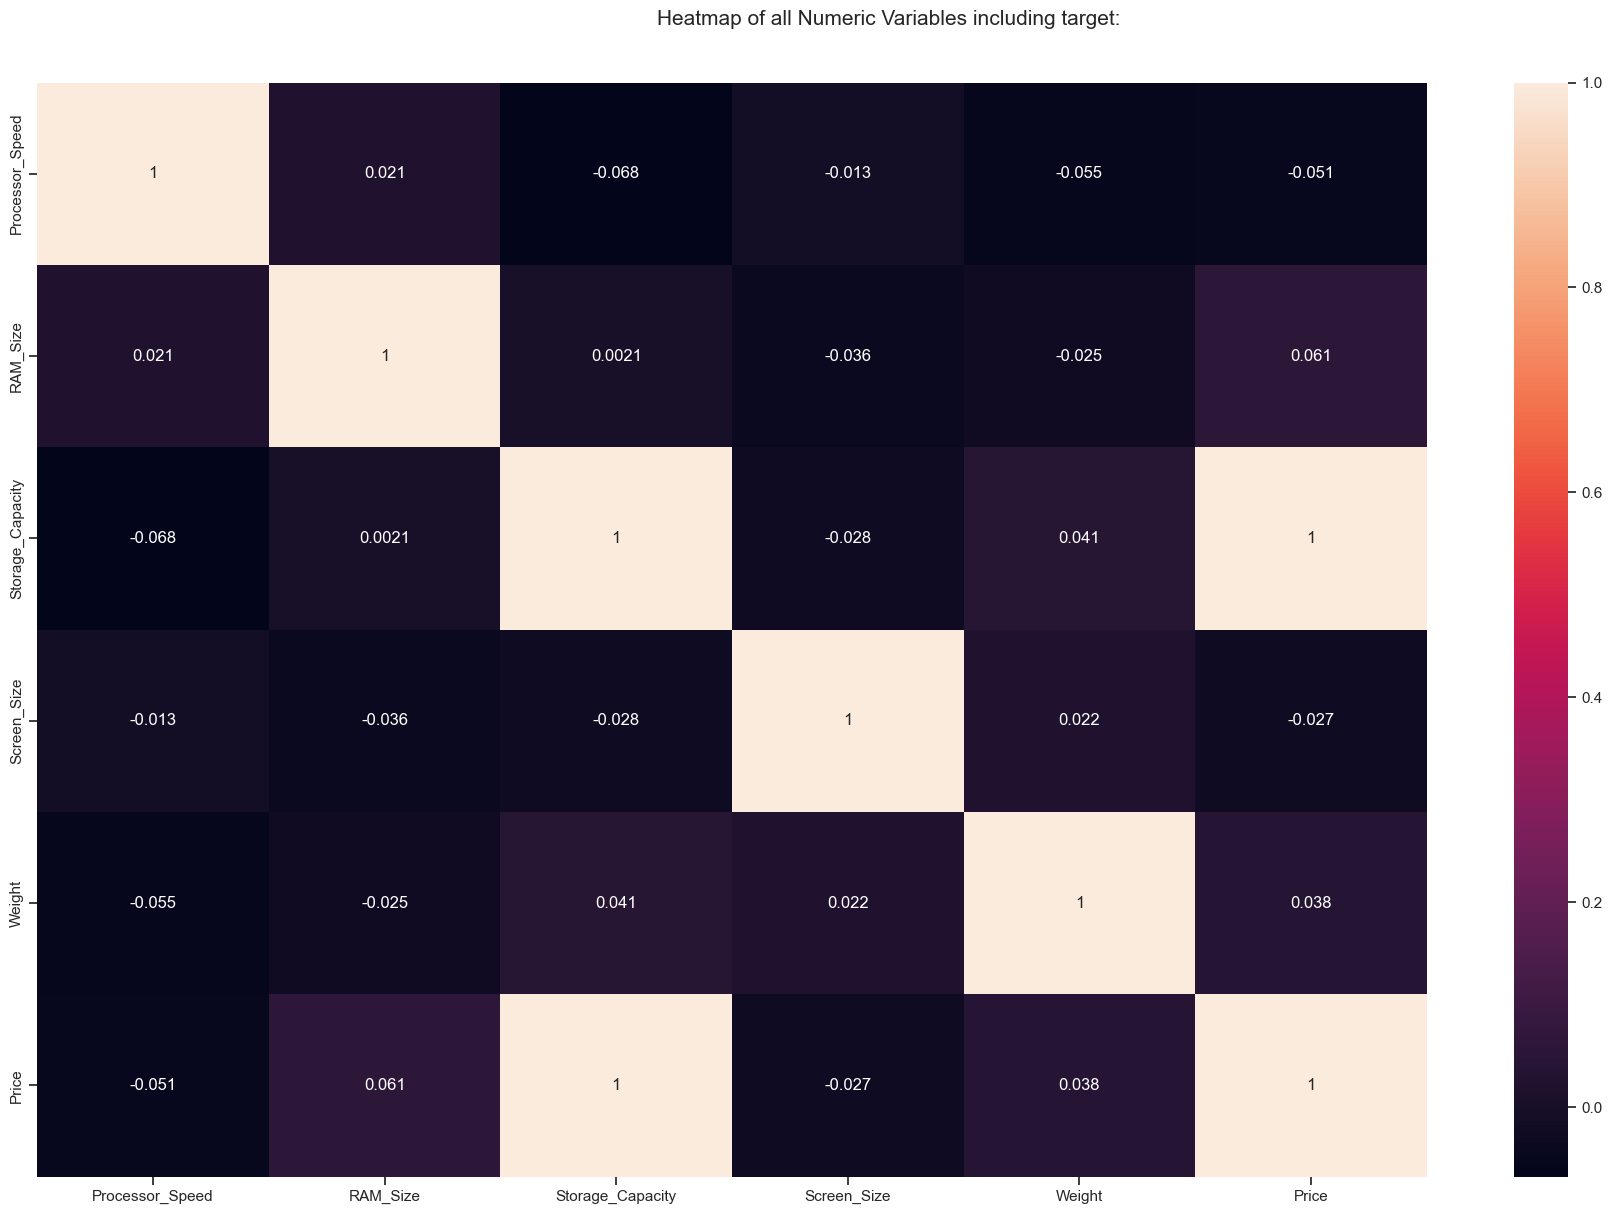

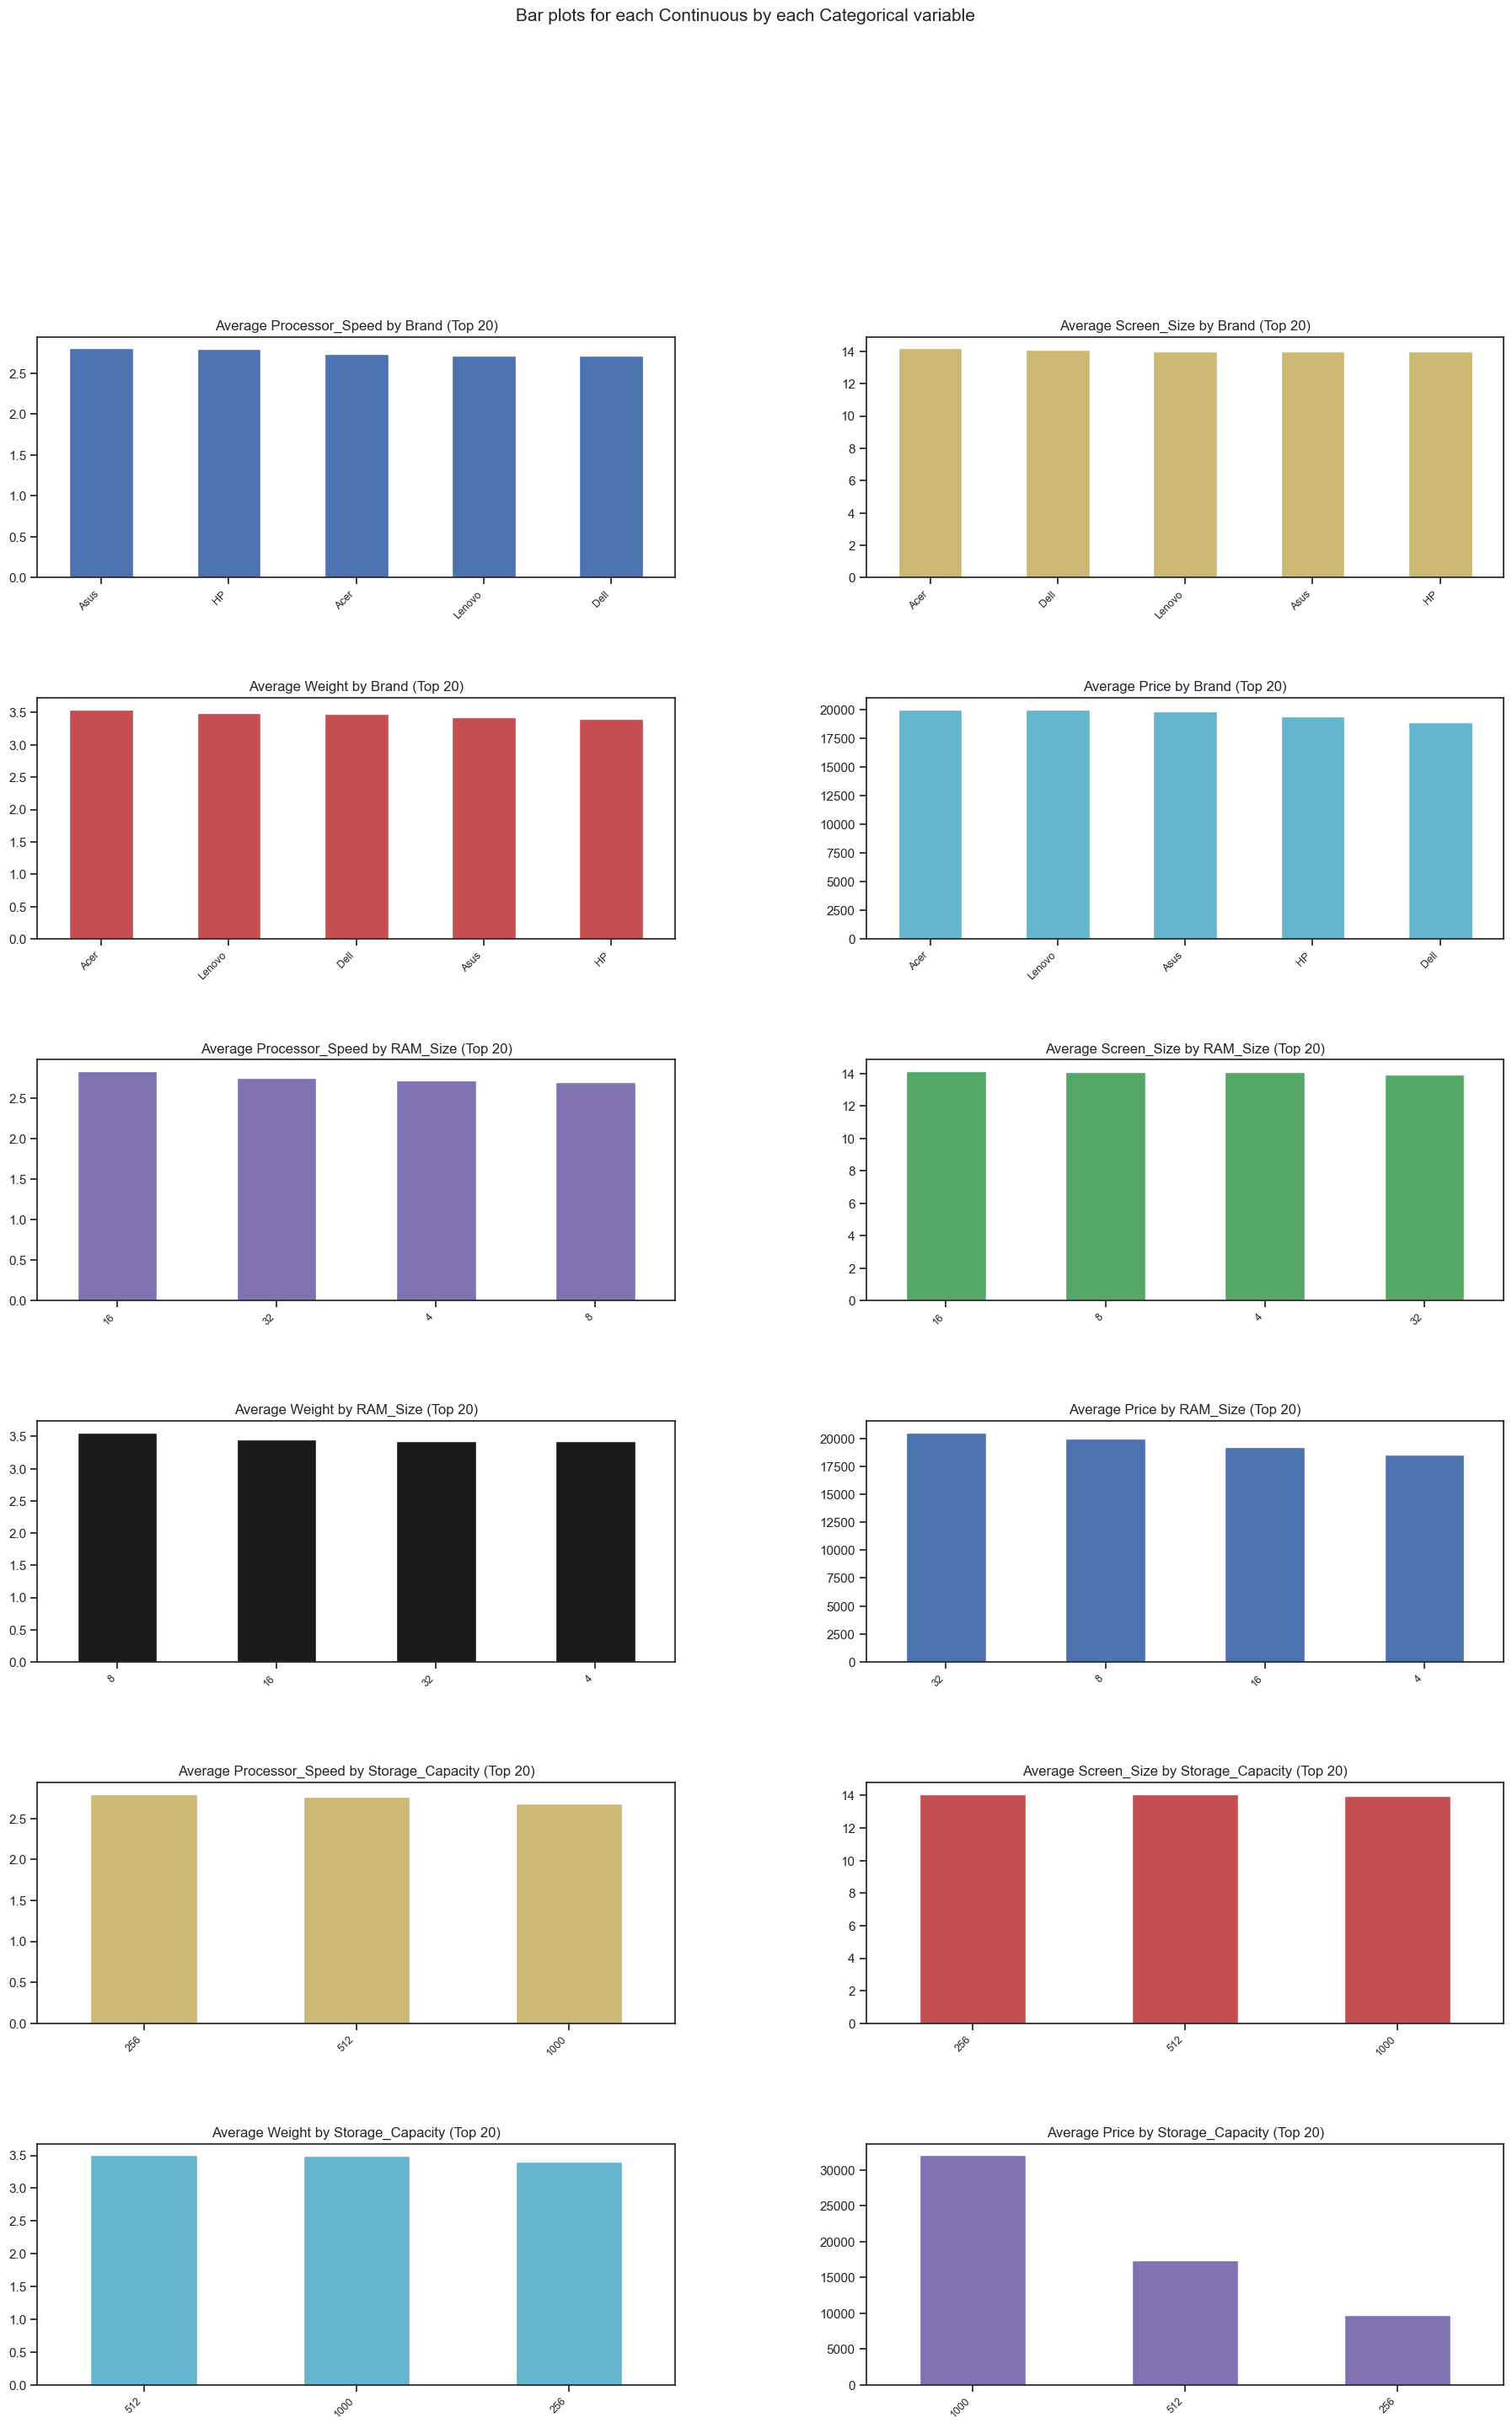

All Plots done
Time to run AutoViz = 18 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [11]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
AV.AutoViz(filename="", dfte=df, chart_format="svg", max_rows_analyzed=1500, max_cols_analyzed=30)

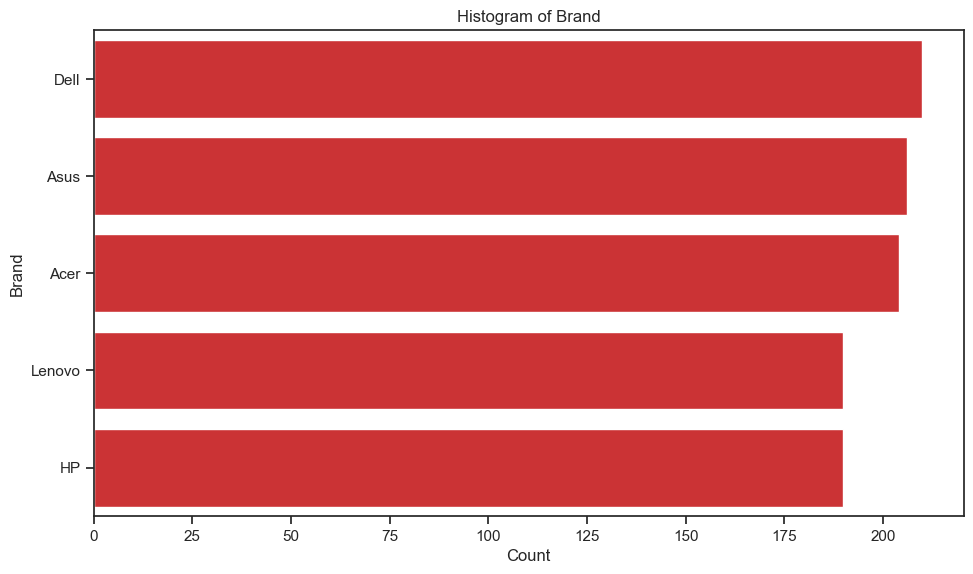

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index)
plt.title('Histogram of Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()